In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Данные для анализа**

In [11]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


**Первичный анализ**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [13]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

*Пропусков нет, при этом часть данных находится в формате object*

**Визуализация**

*Построим пару графиков, чтобы посмотреть, от чего может зависеть income*

<Figure size 720x288 with 0 Axes>

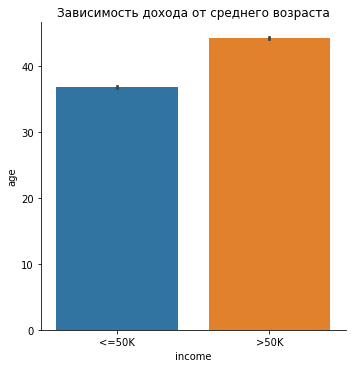

In [14]:
# посмотрим сначала на возраст
plt.figure(figsize=(10,4))
sns.catplot(x="income",y="age",kind='bar',data=df)
plt.title("Зависимость дохода от среднего возраста");

<Figure size 720x288 with 0 Axes>

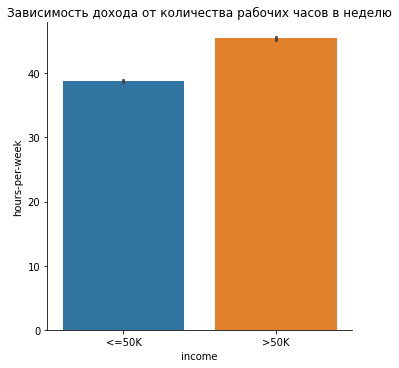

In [15]:
# и на количество часов в неделю
plt.figure(figsize=(10,4))
sns.catplot(x="income",y="hours-per-week",kind='bar',data=df)
plt.title("Зависимость дохода от количества рабочих часов в неделю");

*Мы видим, что среднее значение возраста различное для разных уровней дохода, поэтому будем использовать эту переменную (как не категориальную)*

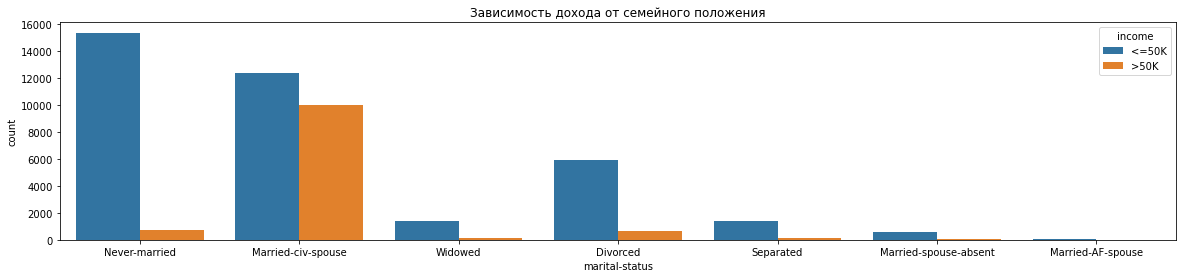

In [16]:
# Посмотрим, зависит ли уровень дохода от семейного положения
plt.figure(figsize=(20,4))
sns.countplot(data=df, x='marital-status', hue='income')
plt.title('Зависимость дохода от семейного положения');

*Мы видим, что в зависимости от семейного положения различается соотношение и по доходу, соответственно, этот параметр оставляем*

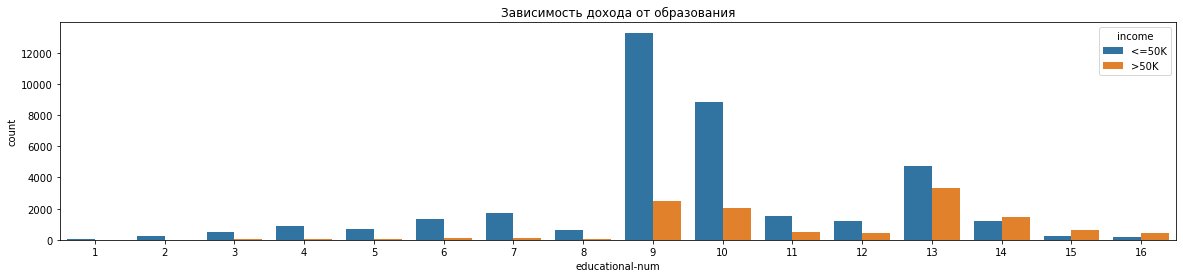

In [17]:
# По аналогии посмотрим на образование (по нумерации)
plt.figure(figsize=(20,4))
sns.countplot(data=df, x='educational-num', hue='income')
plt.title('Зависимость дохода от образования');

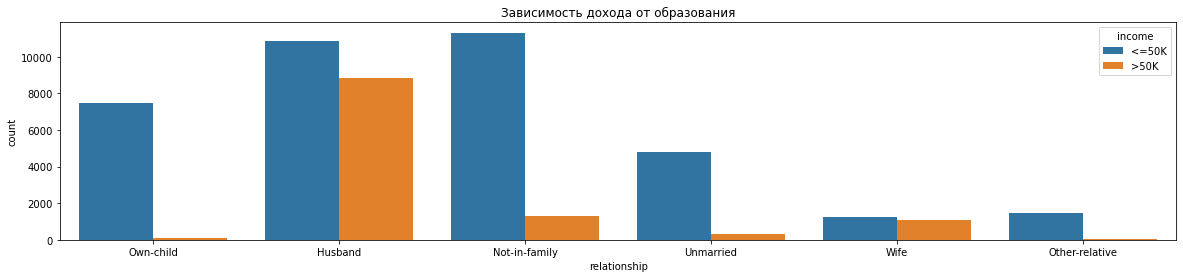

In [18]:
# И на роль в семье
plt.figure(figsize=(20,4))
sns.countplot(data=df, x='relationship', hue='income')
plt.title('Зависимость дохода от образования');

*Также видим зависимость*

**Преобразование категориальных признаков**

*На этом этапе решим, какие признаки будем использовать в модели*

In [19]:
df[df.workclass == '?']

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,?,299831,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,<=50K
22,72,?,132015,7th-8th,4,Divorced,?,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,?,191846,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
48812,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
48822,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


*Признак workclass исключаем, потому что слишком по многим значениям стоит ?. Альтернативно можно было бы посмотреть, как распределено значение по этому признаку в income и проставить по аналогии какой-то самое похожее значение (учитывая распределение), но сейчас мы его просто удалим

In [20]:
df_for_model = df[['age', 'educational-num', 'marital-status', 'relationship', 'race', 'gender', 'hours-per-week', 'income']]

In [21]:
# создаем набор переменных, преобразуя категориальные данные в значения 0 и 1
X = df_for_model[['age', 'educational-num', 'marital-status', 'relationship', 'race', 'gender', 'hours-per-week']]
X = pd.get_dummies(X, drop_first=True)
X.head()

,age,educational-num,hours-per-week,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male
0,25,7,40,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
1,38,9,50,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,28,12,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,44,10,40,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,18,10,30,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0


In [22]:
# целевая переменная income также является категориальной переменной, преобразуем значения в числа, но оставив 1 столбец
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
le.fit(df_for_model['income'])

LabelEncoder()

In [24]:
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [25]:
y = pd.Series(data=le.transform(df_for_model['income']))
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int32

**Разделение выборки на тестовое и обучающее подможнощества**

In [26]:
from sklearn.model_selection import train_test_split 

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train

,age,educational-num,hours-per-week,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male
37193,42,10,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
31093,52,6,35,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
33814,34,9,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
14500,28,9,40,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
23399,46,11,50,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,36,9,40,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1
44732,34,10,50,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
38158,28,10,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
860,46,11,40,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0


**Логистическая регрессия**

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

*Так как у нас часть значений количественные и значительно отличаются от 0и1, то мы их нормализуем с помощью StandardScaler, а потом уже применяем модель логистической регрессии*

In [30]:
model_log_reg = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

In [31]:
model_log_reg.fit(X_train, y_train)
predictions = model_log_reg.predict(X_test) # сохранение в переменной предсказанных значений для тестовой выборки

In [32]:
model_log_reg.score(X_train, y_train) # проверка точности модели на обучающей выборке

0.8205154454482635

In [33]:
model_log_reg.score(X_test, y_test) # проверка точности модели на тестовой выборке

0.8257754120176067

*В целом показатель неплохой, точность предсказания (на данных, которые ранее модель не видела) - 82%*

**Метод опорных векторов**

In [37]:
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(kernel='poly')) 

In [38]:
# сначала сделаем с нормализацией
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='poly'))])

In [40]:
clf.score(X_train, y_train)

0.8242776341719346

In [44]:
clf.score(X_test, y_test)

0.8296652676834886

In [42]:
# и без нормализации
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [43]:
svc.score(X_train, y_train)

0.8234330611931513

In [45]:
svc.score(X_test, y_test)

0.8269014228682567

**Выводы**

*Были подготовлены две модели для классификации дохода (больше или до 50К) в зависимости от параметров (возраст, уровень образования, семейное положение, статус в семье, раса, пол, количество-рабочих часов в неделю): логистическая регрессия и модель опорных векторов. Категориальные параметры предварительно были переведены в категориальные (1 и 0), а некатегориальные отнормированы. По итогам обучения моделей лучшие значения предсказания на тестовых выборках показала **модель опорных векторов с нормализацией данных** (около 83% верных предсказаний). В целом модель предсказывает значения не идеально, но с достаточно хорошими результатами и возможна к применению для классификации дохода.*